<a href="https://colab.research.google.com/github/xRentino/CS132-Poverty/blob/main/combined_exploratory_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Color settings
colors = ["#648FFF", "#785EF0", "#A11C5D", "#FE6100", "#FFB000", "#000000", "#FFFFFF"]
colors_grad = sns.color_palette('flare_r', 12)
colors_heat1 = sns.color_palette('flare_r', as_cmap=True)
colors_heat2 = sns.diverging_palette(315, 261, s=74, l=50, center='dark', as_cmap=True)
color_bg = "#1B181C"
color_text = "#FFFFFF"

# Plot settings
mpl.rcParams['figure.dpi'] = 600
mpl.rcParams["figure.figsize"] = (20, 8)
mpl.rcParams['font.family'] = 'Roboto'
mpl.rcParams['figure.titlesize'] = 32
mpl.rcParams['axes.titlesize'] = 32
mpl.rcParams['axes.titleweight'] = 'bold'
mpl.rcParams['axes.labelsize'] = 22
mpl.rcParams['xtick.labelsize'] = 22
mpl.rcParams['ytick.labelsize'] = 22
mpl.rcParams['axes.titlepad'] = 72
mpl.rcParams['axes.labelpad'] = 10
mpl.rcParams['xtick.major.pad'] = 10
mpl.rcParams['ytick.major.pad'] = 10
mpl.rcParams['xtick.major.width'] = 0
mpl.rcParams['xtick.minor.width'] = 0
mpl.rcParams['ytick.major.width'] = 0
mpl.rcParams['ytick.minor.width'] = 0
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.grid'] = False
mpl.rcParams['legend.title_fontsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['legend.frameon'] = False
plt.rcParams['patch.linewidth'] = 0
plt.rcParams['patch.edgecolor'] = 'none'
mpl.rcParams["figure.facecolor"] = color_bg
mpl.rcParams["axes.facecolor"] = color_bg
mpl.rcParams["savefig.facecolor"] = color_bg
mpl.rcParams['text.color'] = color_text
mpl.rcParams['axes.labelcolor'] = color_text
mpl.rcParams['xtick.color'] = color_text
mpl.rcParams['ytick.color'] = color_text
mpl.rcParams['axes.edgecolor'] = color_text

In [3]:
# Load Dataset and Data Cleaning
poverty_data = pd.read_csv("CS132_DataSheet-by-area.csv")

In [4]:
# Extract data
x = poverty_data['Date formatted']
x = pd.to_datetime(x, format='%Y-%m-%d', errors='coerce')

# Convert datetime to numerical feature because YYYY-MM-DD is considered a string but .fit method needs a float
reference_date = x.min()  
x_numeric = (x - reference_date).dt.days  
x_numeric = x_numeric.values.reshape(-1, 1)  

# Original datetime values for plotting
x_datetime = x  

y_poor = poverty_data['Raw Count Poor']
y_not_poor = poverty_data['Raw Count Borderline']
y_borderline = poverty_data['Raw Count Not Poor']

In [5]:
# Data Split and Reshape
# Poor
X_train_poor, X_test_poor, Y_train_poor, Y_test_poor = train_test_split(x_numeric, y_poor, test_size=0.5, random_state=42)
X_train_poor = np.array(X_train_poor).reshape(-1, 1)
X_test_poor = np.array(X_test_poor).reshape(-1, 1)
Y_test_poor = np.array(Y_test_poor)

X_train_poor_dt, X_test_poor_dt = train_test_split(x_datetime, test_size=0.5, random_state=42)

# Not Poor
X_train_not_poor, X_test_not_poor, Y_train_not_poor, Y_test_not_poor = train_test_split(x_numeric, y_not_poor, test_size=0.5, random_state=42)
X_train_not_poor = np.array(X_train_not_poor).reshape(-1, 1)
X_test_not_poor = np.array(X_test_not_poor).reshape(-1, 1)
Y_test_not_poor = np.array(Y_test_not_poor)

X_train_not_poor_dt, X_test_not_poor_dt = train_test_split(x_datetime, test_size=0.5, random_state=42)

# Borderline
X_train_borderline, X_test_borderline, Y_train_borderline, Y_test_borderline = train_test_split(x_numeric, y_borderline, test_size=0.5, random_state=42)
X_train_borderline = np.array(X_train_borderline).reshape(-1, 1)
X_test_borderline = np.array(X_test_borderline).reshape(-1, 1)
Y_test_borderline = np.array(Y_test_borderline)

X_train_borderline_dt, X_test_borderline_dt = train_test_split(x_datetime, test_size=0.5, random_state=42)

In [6]:
# Regression Models
# Poor
model_poor = linear_model.LinearRegression()
model_poor.fit(X_train_poor, Y_train_poor)
Y_pred_poor = model_poor.predict(X_test_poor)

# Not Poor
model_not_poor = linear_model.LinearRegression()
model_not_poor.fit(X_train_not_poor, Y_train_not_poor)
Y_pred_not_poor = model_not_poor.predict(X_test_not_poor)

# Borderline
model_borderline = linear_model.LinearRegression()
model_borderline.fit(X_train_borderline, Y_train_borderline)
Y_pred_borderline = model_borderline.predict(X_test_borderline)

In [7]:
# Print Regression Metrics
print("Poor:")
print(f"Coefficient: {model_poor.coef_[0]:.2f}")
print(f"Intercept: {model_poor.intercept_:.2f}")
print(f"Mean Squared Error: {mean_squared_error(Y_test_poor, Y_pred_poor):.2f}")
print(f"R-squared: {r2_score(Y_test_poor, Y_pred_poor):.2f}")
print("\nNot Poor:")
print(f"Coefficient: {model_not_poor.coef_[0]:.2f}")
print(f"Intercept: {model_not_poor.intercept_:.2f}")
print(f"Mean Squared Error: {mean_squared_error(Y_test_not_poor, Y_pred_not_poor):.2f}")
print(f"R-squared: {r2_score(Y_test_not_poor, Y_pred_not_poor):.2f}")
print("\nBorderline:")
print(f"Coefficient: {model_borderline.coef_[0]:.2f}")
print(f"Intercept: {model_borderline.intercept_:.2f}")
print(f"Mean Squared Error: {mean_squared_error(Y_test_borderline, Y_pred_borderline):.2f}")
print(f"R-squared: {r2_score(Y_test_borderline, Y_pred_borderline):.2f}")

Poor:
Coefficient: 0.03
Intercept: 132.35
Mean Squared Error: 1455.02
R-squared: -0.01

Not Poor:
Coefficient: -0.05
Intercept: 115.15
Mean Squared Error: 400.08
R-squared: 0.59

Borderline:
Coefficient: 0.02
Intercept: 52.49
Mean Squared Error: 1582.91
R-squared: 0.15


TypeError: Invalid type for timedelta scalar: <class 'pandas._libs.tslibs.timestamps.Timestamp'>

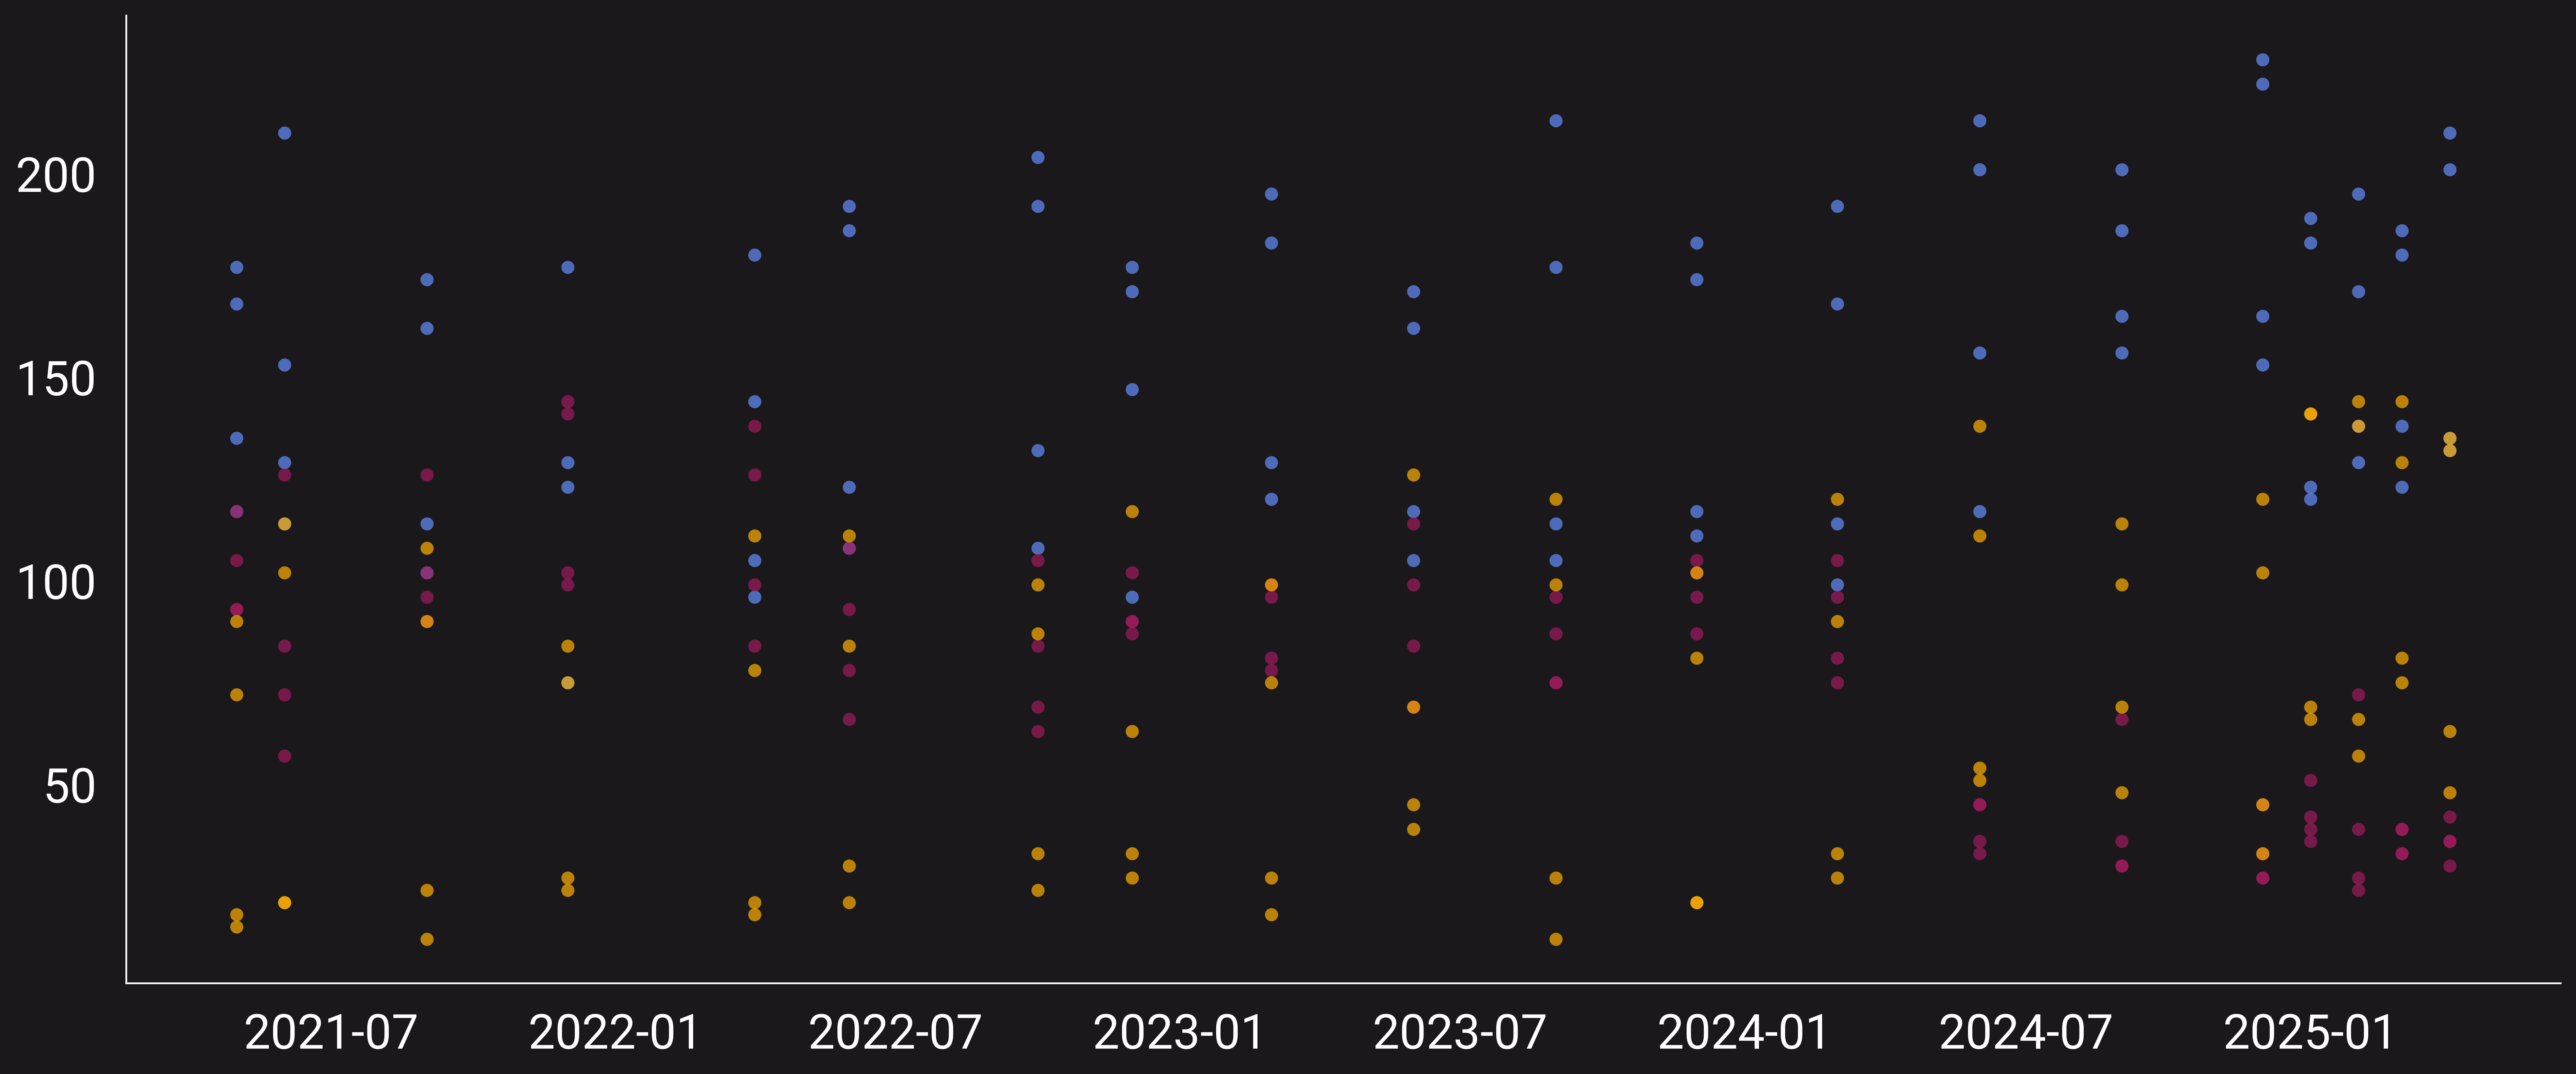

In [16]:
# Create the combined plot
plt.figure()

# Scatter plots
scatter_poor = plt.scatter(x_datetime, y_poor, color=colors[0], alpha=0.7)
scatter_not_poor = plt.scatter(x_datetime, y_not_poor, color=colors[2], alpha=0.7)
scatter_borderline = plt.scatter(x_datetime, y_borderline, color=colors[4], alpha=0.7)

# Regression lines
# Generate points for the regression line across the range of years
x_range_numeric = np.array([[x_datetime.min()], [x_datetime.max()]])
y_pred_poor_line = model_poor.predict(x_range)
y_pred_not_poor_line = model_not_poor.predict(x_range)
y_pred_borderline_line = model_borderline.predict(x_range)

line_poor = plt.plot(x_range, y_pred_poor_line, color=colors[0], linestyle='--')
line_not_poor = plt.plot(x_range_dt, y_pred_not_poor_line, color=colors[2], linestyle='--')
line_borderline = plt.plot(x_range_dt, y_pred_borderline_line, color=colors[4], linestyle='--')

# Events

# 2023 Post Pandemic Recovery
specific_year = 2023
plt.axvline(x=specific_year, color='#FF88D0', linestyle='--', )
plt.annotate(
    f'2023 Post Pandemic Recovery',
    xy=(specific_year, 200),
    xytext=(specific_year-1, 100),  # Adjust position for clarity
    arrowprops=dict(facecolor=colors[2], arrowstyle='->', lw=1.5),
    fontsize=10,
    bbox=dict(boxstyle='round,pad=0.3', edgecolor='white', facecolor=colors[2])  # Text box style
)

# Legend for scatter points
legend1 = plt.legend(handles=[scatter_poor, scatter_not_poor, scatter_borderline],
                     labels=['Poor', 'Not Poor', 'Borderline'],
                     title='Data',
                     loc='upper left',
                     bbox_to_anchor=(1.05, 1.0))
plt.gca().add_artist(legend1)

# Legend for trend lines
legend2 = plt.legend(handles=[line_poor[0], line_not_poor[0], line_borderline[0]],
                     labels=['Poor', 'Not Poor', 'Borderline'],
                     title='Trends',
                     loc='upper left',
                     bbox_to_anchor=(1.05, 0.7))
plt.gca().add_artist(legend2)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Respondent Count')
plt.title('Poverty Respondent Counts Over Time', fontdict={'family': 'Roboto', 'weight': 'bold'})
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.05))

# Adjust the figure margins to accommodate the legends
plt.subplots_adjust(right=1)

# Adjust layout to prevent clipping
plt.tight_layout()

plt.show()
# Save the plot
#plt.savefig('poverty_combined_graph.png')